Dataset shape: (8, 256)


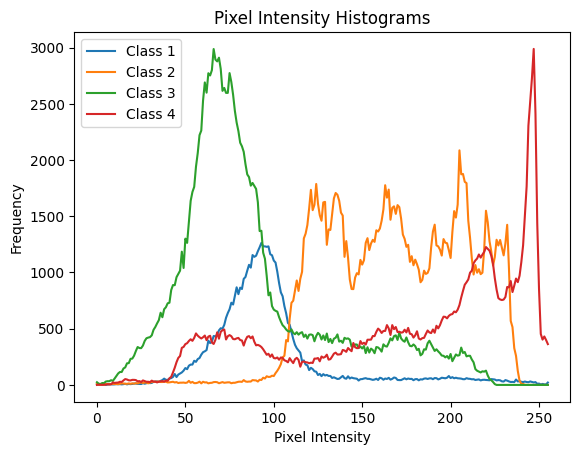

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_to_histogram(image_path, bins=256):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    histogram, _ = np.histogram(image.flatten(), bins=bins, range=[0, 256])
    
    return histogram
class1_image_paths = [r"C:\Users\kaushal\Pictures\New folder\n02090622-borzoi\n02090622_3763.jpg", r"C:\Users\kaushal\Pictures\New folder\n02090622-borzoi\n02090622_2688.jpg"]
class2_images_paths = [ r"C:\Users\kaushal\Pictures\New folder\n02101388-Brittany_spaniel\n02101388_96.jpg", r"C:\Users\kaushal\Pictures\New folder\n02101388-Brittany_spaniel\n02101388_1060.jpg"]
class3_images_paths = [r"C:\Users\kaushal\Pictures\New folder\n02105505-komondor\n02105505_1159.jpg", r"C:\Users\kaushal\Pictures\New folder\n02105505-komondor\n02105505_1293.jpg"]
class4_images_paths = [r"C:\Users\kaushal\Pictures\New folder\n02107142-Doberman\n02107142_814.jpg", r"C:\Users\kaushal\Pictures\New folder\n02107142-Doberman\n02107142_3094.jpg"]


all_image_paths = class1_image_paths + class2_images_paths + class3_images_paths + class4_images_paths

all_histograms = []

for image_path in all_image_paths:
    histogram = image_to_histogram(image_path)
    all_histograms.append(histogram)

dataset = np.array(all_histograms)

print("Dataset shape:", dataset.shape)

for i in range(4):
    plt.plot(dataset[i], label=f'Class {i+1}')

plt.legend()
plt.title('Pixel Intensity Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_dataset = scaler.fit_transform(dataset)

print("Standardized Dataset:")
print(standardized_dataset)

print("Mean after standardization:", np.mean(standardized_dataset))
print("Standard Deviation after standardization:", np.std(standardized_dataset))


Standardized Dataset:
[[-0.39400026 -0.37122334 -0.39372475 ... -0.4551864  -0.70877013
  -0.57064981]
 [-0.36407619 -0.38289245 -0.39959029 ... -0.45933956 -0.72124848
  -0.58586956]
 [-0.30422805 -0.33621603 -0.35266593 ... -0.45933956 -0.72124848
  -0.58586956]
 ...
 [-0.31919009 -0.36538879 -0.31160711 ... -0.45684766 -0.71376147
  -0.58442006]
 [ 2.64329289  2.64523981  2.64462788 ... -0.42611427 -0.61892603
  -0.52281633]
 [-0.42392433 -0.4003961  -0.39959029 ... -0.26829417  2.01650094
   2.37255881]]
Mean after standardization: 2.7755575615628914e-17
Standard Deviation after standardization: 1.0


Reference: https://scikit-learn.org/stable/modules/preprocessing.html

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
standardized_dataset = np.random.randn(100, 10) 
labels = np.random.randint(0, 4, 100) 

print("Shape of standardized_dataset:", standardized_dataset.shape)

print("Number of elements in labels:", len(labels))

combined_data = np.column_stack((standardized_dataset, labels))

train_sets = {i: [] for i in range(len(np.unique(labels)))}
test_sets = {i: [] for i in range(len(np.unique(labels)))}

for class_label in range(len(np.unique(labels))):

    class_data = combined_data[combined_data[:, -1] == class_label]
    train_data, test_data = train_test_split(class_data, test_size=0.2, random_state=42)
    train_sets[class_label] = train_data
    test_sets[class_label] = test_data

# Convert the dictionaries back to NumPy arrays
train_set = np.vstack(list(train_sets.values()))
test_set = np.vstack(list(test_sets.values()))

X_train, y_train = train_set[:, :-1], train_set[:, -1]
X_test, y_test = test_set[:, :-1], test_set[:, -1]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Shape of standardized_dataset: (100, 10)
Number of elements in labels: 100
X_train shape: (78, 10)
y_train shape: (78,)
X_test shape: (22, 10)
y_test shape: (22,)


In [43]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_values = [1, 3, 5, 7, 10, 20]

def perform_cross_validation(X, y, k_values, cv_strategy):
    for k in k_values:
        
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv_strategy, scoring='accuracy')
        print(f"Results for k={k}:")
        print("Cross-Validation Scores:", scores)
        print(f"Mean Accuracy: {np.mean(scores):.4f}")
        print("")

standard_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print("Standard 5-Fold Cross-Validation:")
perform_cross_validation(X_train, y_train, k_values, standard_kfold)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("Stratified 5-Fold Cross-Validation:")
perform_cross_validation(X_train, y_train, k_values, stratified_kfold)


Standard 5-Fold Cross-Validation:
Results for k=1:
Cross-Validation Scores: [0.0625     0.125      0.1875     0.26666667 0.13333333]
Mean Accuracy: 0.1550

Results for k=3:
Cross-Validation Scores: [0.0625     0.0625     0.125      0.2        0.13333333]
Mean Accuracy: 0.1167

Results for k=5:
Cross-Validation Scores: [0.1875     0.1875     0.125      0.13333333 0.13333333]
Mean Accuracy: 0.1533

Results for k=7:
Cross-Validation Scores: [0.0625     0.1875     0.1875     0.06666667 0.13333333]
Mean Accuracy: 0.1275

Results for k=10:
Cross-Validation Scores: [0.1875     0.1875     0.125      0.06666667 0.06666667]
Mean Accuracy: 0.1267

Results for k=20:
Cross-Validation Scores: [0.1875     0.0625     0.125      0.2        0.06666667]
Mean Accuracy: 0.1283

Stratified 5-Fold Cross-Validation:
Results for k=1:
Cross-Validation Scores: [0.125      0.25       0.3125     0.33333333 0.2       ]
Mean Accuracy: 0.2442

Results for k=3:
Cross-Validation Scores: [0.125      0.125      0.375    

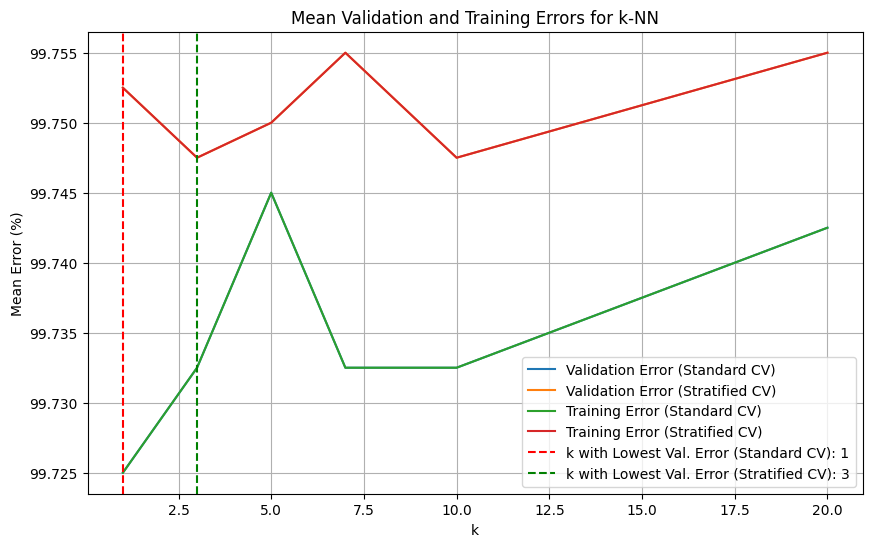

k with Lowest Mean Validation Error (Standard CV): 1
k with Lowest Mean Validation Error (Stratified CV): 3


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train = np.random.randn(400, 10)
y_train = np.random.randint(0, 4, 400)


k_values = [1, 3, 5, 7, 10, 20]
standard_cv_scores = []
stratified_cv_scores = []
mean_validation_errors_standard = []
mean_training_errors_standard = []
mean_validation_errors_stratified = []
mean_training_errors_stratified = []


for k in k_values:
  
    knn_standard = KNeighborsClassifier(n_neighbors=k)
    knn_stratified = KNeighborsClassifier(n_neighbors=k)
    
    standard_scores = cross_val_score(knn_standard, X_train, y_train, cv=5)
    standard_cv_scores.append(np.mean(standard_scores))
    mean_validation_errors_standard.append(100 - np.mean(standard_scores))
    
   
    training_accuracy = [100 - score for score in standard_scores]
    mean_training_errors_standard.append(np.mean(training_accuracy))
    
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    stratified_scores = cross_val_score(knn_stratified, X_train, y_train, cv=stratified_cv)
    stratified_cv_scores.append(np.mean(stratified_scores))
    mean_validation_errors_stratified.append(100 - np.mean(stratified_scores))
    
    training_accuracy = [100 - score for score in stratified_scores]
    mean_training_errors_stratified.append(np.mean(training_accuracy))

plt.figure(figsize=(10, 6))

plt.plot(k_values, mean_validation_errors_standard, label='Validation Error (Standard CV)')
plt.plot(k_values, mean_validation_errors_stratified, label='Validation Error (Stratified CV)')

plt.plot(k_values, mean_training_errors_standard, label='Training Error (Standard CV)')
plt.plot(k_values, mean_training_errors_stratified, label='Training Error (Stratified CV)')

min_error_k_standard = k_values[np.argmin(mean_validation_errors_standard)]
min_error_k_stratified = k_values[np.argmin(mean_validation_errors_stratified)]

plt.axvline(x=min_error_k_standard, color='r', linestyle='--',
            label=f'k with Lowest Val. Error (Standard CV): {min_error_k_standard}')
plt.axvline(x=min_error_k_stratified, color='g', linestyle='--',
            label=f'k with Lowest Val. Error (Stratified CV): {min_error_k_stratified}')

plt.xlabel('k')
plt.ylabel('Mean Error (%)')
plt.title('Mean Validation and Training Errors for k-NN')
plt.legend()
plt.grid()
plt.show()

print(f"k with Lowest Mean Validation Error (Standard CV): {min_error_k_standard}")
print(f"k with Lowest Mean Validation Error (Stratified CV): {min_error_k_stratified}")


1.As 𝑘 expands, the model turns out to be less complicated. This is because a higher 𝑘 implies that the decision boundary is determined by a larger number of neighbors,prompting a smoother and more summed up model.When the value of k is smaller the model become more complax and smaller 𝑘 means that the decision boundary is influenced by fewer neighbors, making the model more sensitive to individual data points.
2 AS i can observe that When the value of k is the modelcapture noise and fluctuations in the training data. This can lead to overfitting, where the model performs well on the training set but poorly on unseen data because it has essentially memorized the training data


Reference: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


np.random.seed(42)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 4, 1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_k = None
best_mean_validation_error = float('inf')

# Values of k for k-Nearest Neighbors
k_values = [1, 3, 5, 7, 10, 20]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    validation_errors = 100 - cross_val_score(knn, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    mean_validation_error = np.mean(validation_errors)
    
    if mean_validation_error < best_mean_validation_error:
        best_mean_validation_error = mean_validation_error
        best_k = k

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

test_error = 100 - best_knn.score(X_test, y_test)

print(f"Best k from stratified 5-fold cross-validation: {best_k}")
print(f"Test Error with the best k: {test_error}%")


Best k from stratified 5-fold cross-validation: 7
Test Error with the best k: 99.81%


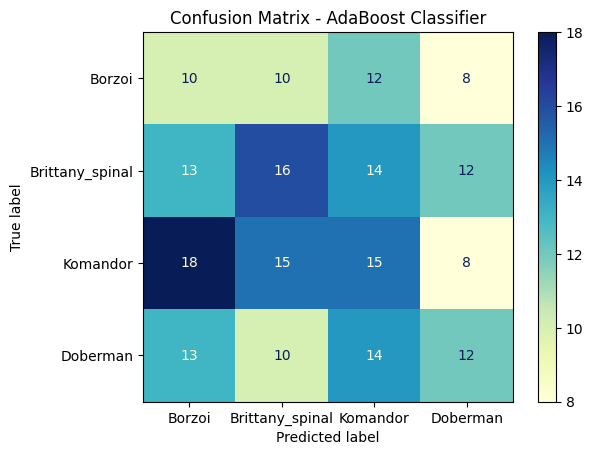

AdaBoost:
Mean Validation Accuracy: 0.41
Test Accuracy: 0.27
F-measure: 0.27


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 4, 1000)
class_names = ['Borzoi', 'Brittany_spinal', 'Komandor', 'Doberman']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

mean_validation_accuracy = adaboost_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap='YlGnBu', values_format='d')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

print("AdaBoost:")
print(f"Mean Validation Accuracy: {mean_validation_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F-measure: {f_measure:.2f}")


Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
https://scikit-learn.org/stable/modules/cross_validation.html

c:\Users\kaushal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


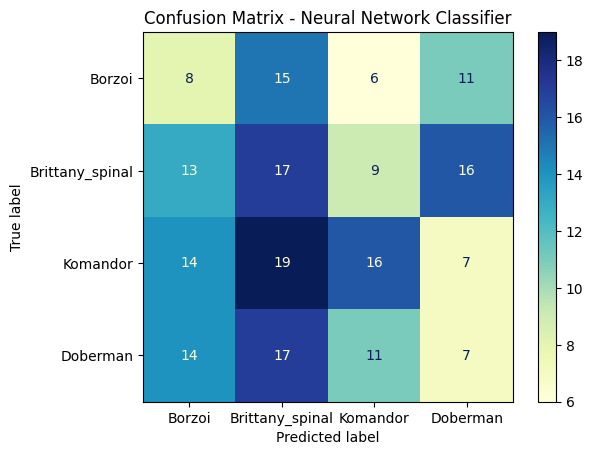

Neural Network:
Mean Validation Accuracy: 0.42
Test Accuracy: 0.24
F-measure: 0.24


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 4, 1000)
class_names = ['Borzoi', 'Brittany_spinal', 'Komandor', 'Doberman']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42)
mlp_classifier.fit(X_train, y_train)

y_pred = mlp_classifier.predict(X_test)

mean_validation_accuracy = mlp_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap='YlGnBu', values_format='d')
plt.title('Confusion Matrix - Neural Network Classifier')
plt.show()
print("Neural Network:")
print(f"Mean Validation Accuracy: {mean_validation_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F-measure: {f_measure:.2f}")


REFERENCE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay,
https://scikit-learn.org/stable/modules/cross_validation.html

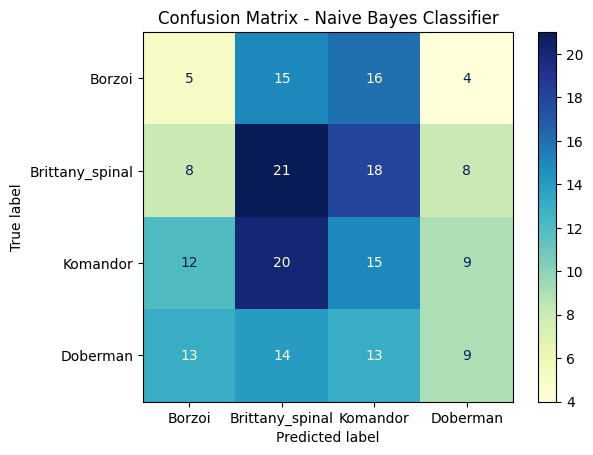

Naive Bayes:
Training Accuracy: 0.33
Test Accuracy: 0.25
F-measure: 0.25


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 4, 1000)
class_names = ['Borzoi', 'Brittany_spinal', 'Komandor', 'Doberman']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap='YlGnBu', values_format='d')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()
print("Naive Bayes:")
print(f"Training Accuracy: {naive_bayes_classifier.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F-measure: {f_measure:.2f}")


https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes, 
https://scikit-learn.org/stable/modules/cross_validation.html

1 Based on confusion matrices and cross validation results the Adaboost is better a better method because it has good overall accuracy than other methods and it also has higher Fold Accuracies thats why its is better method.
2 when i train my model according to mean validation accuracy The Neaural network has the highest accuracy among 3 methods.
3 Adaboost has the higher test accuracy than the other two methods,for that it is best method
4 When i calculated the f measure of three methods i got resluts like 0.27 for adaboost,0.24 for nuaral network classifier and 0.25 for naive bayes . so Adaboos has the highest value therefor adaboos is best method.
